------------------------------------------------------------------------------------------------------------
Separation Time = 0
Number of Migrant: 100

180 180


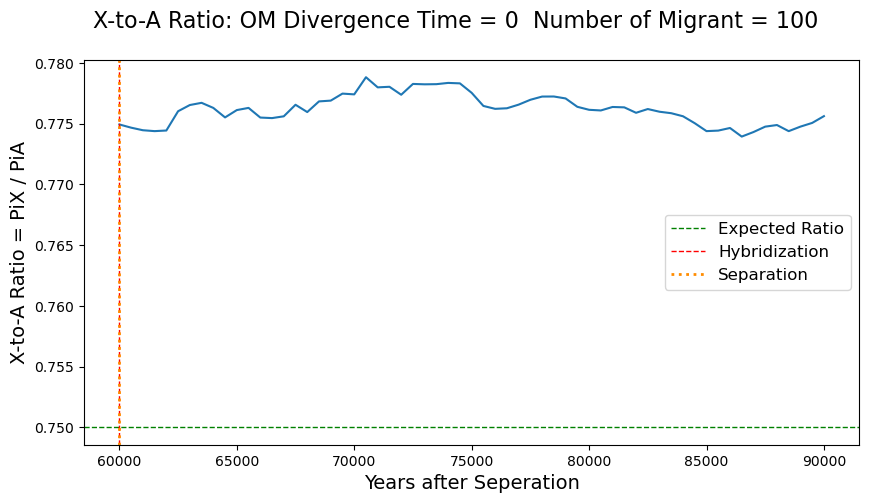

------------------------------------------------------------------------------------------------------------
Separation Time = 5000
Number of Migrant: 100

190 190


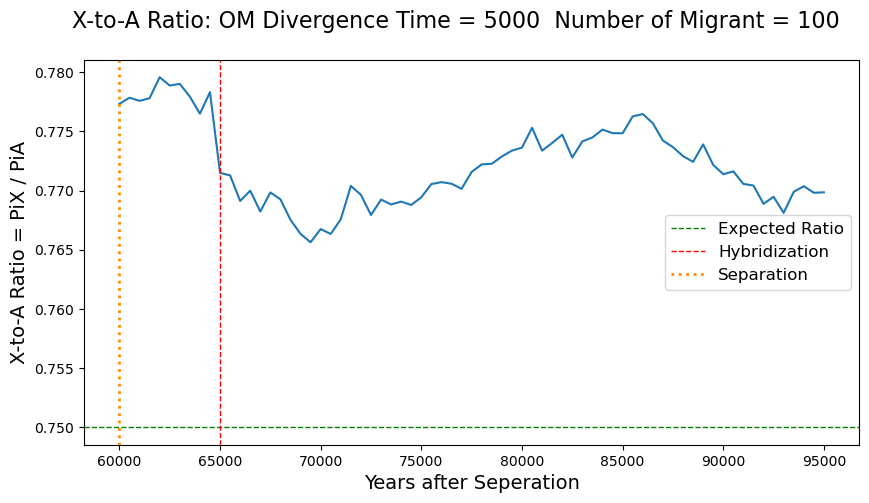

------------------------------------------------------------------------------------------------------------
Separation Time = 10000
Number of Migrant: 100

200 200


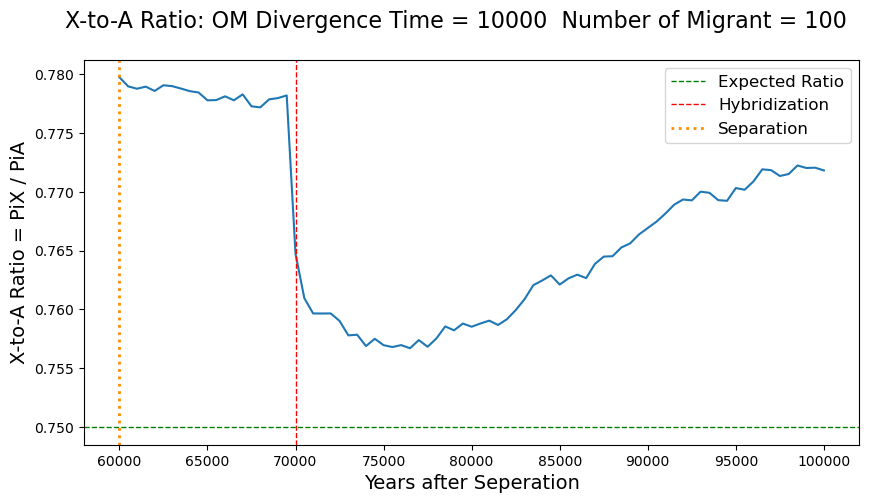

------------------------------------------------------------------------------------------------------------
Separation Time = 15000
Number of Migrant: 100

210 210


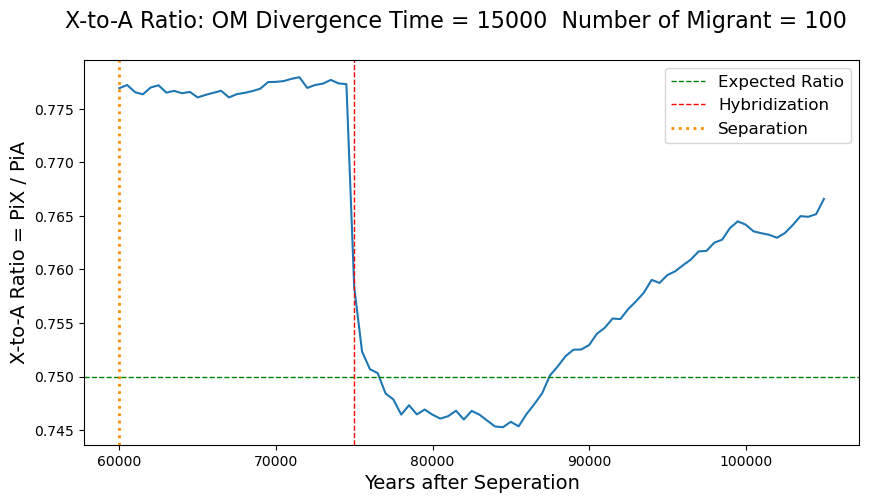

------------------------------------------------------------------------------------------------------------
Separation Time = 20000
Number of Migrant: 100

220 220


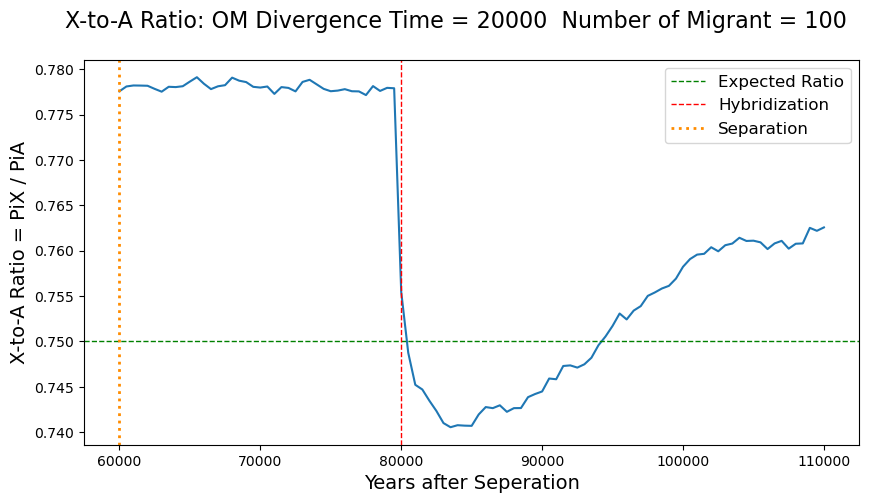

------------------------------------------------------------------------------------------------------------
Separation Time = 25000
Number of Migrant: 100

230 230


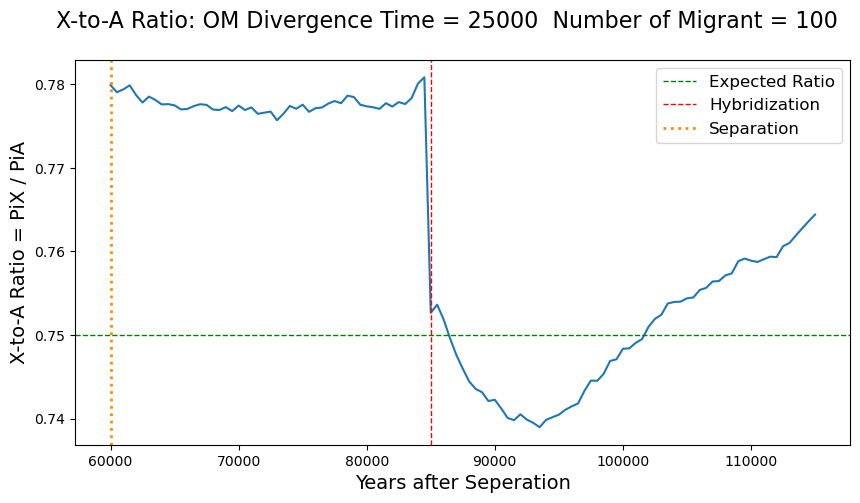

ZeroDivisionError: division by zero

In [37]:
#Number of Migrants = 1

import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Hybridization/1SLiM_File/"
FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Hybridization/"

TSEP = [0,5000,10000,15000,20000,25000,30000]
#TSEP = [20000]
nmig = 100

counter = 0
tBin = 60000

expected_ratio = 0.8296
SR = 0.5
Ne = 4*750*(1-SR)*SR   # Ne = 4*Nm*Nf/N  => Ne = 4*N*(1-SR)*SR 
expected_teta = round (4*Ne*40*1.25e-8,10)

for tsep in TSEP:
    L_XtoA = []
    N = int((tBin+tsep+30000)/500)
    for NUM in range(1,21):

        XtoA = []
        File = FOLDER + f"NWFLT_Hyb_Pi_OM{tsep},{nmig},{NUM}.txt"
        if os.path.isfile(File):
            with open(File, 'r', encoding='utf-8') as Text:
                for ligne in Text:
                    Values = ligne.strip().split()
                    if len(Values) > 1:
                        try:
                            XtoA.append(float(Values[1]) / float(Values[0]))
                        except (ValueError, ZeroDivisionError):
                            pass  # ou afficher un message d'erreur si tu veux
        L_XtoA .append(XtoA)
    
    XtoA_mean = [0 for j in range (1,N+1)]
    for j in range (N):
        S = 0
        c = 0
        for el in L_XtoA:
            if len(el) > j:
                S += el[j]
                c += 1
        #XtoA_mean[j] = S/len(L_XtoA)
        XtoA_mean[j] = S/c
    Steps = [500*j for j in range (1,N+1)]
    #print(N,Steps)
    
    print("------------------------------------------------------------------------------------------------------------")
    print("Separation Time = "+str(tsep))
    print("Number of Migrant: "+str(nmig))
    print()
    print(len(Steps),len(XtoA_mean))
    
    fig, ax = mp.subplots(figsize=(10, 5))
    fig.suptitle(f"X-to-A Ratio: OM Divergence Time = {tsep}  Number of Migrant = {nmig} ", fontsize=16)

    ax.plot(Steps[int(60000/500-1):], XtoA_mean[int(60000/500-1):])
    ax.set_xlabel("Years after Seperation", fontsize=14)
    ax.set_ylabel("X-to-A Ratio = PiX / PiA", fontsize=14)
    ax.axhline(y=0.75, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
    #ax.axhline(y=0.75, color='green', linestyle='--',linewidth=1, label='NWF_LT Expected Ratio')
    #ax.axhline(y=0.8293897929682634, color='orange', linestyle='--',linewidth=2, label='Burning Period Ratio')
    ax.axvline(x=tBin+tsep, color='red', linestyle='--', linewidth=1, label='Hybridization')
    ax.axvline(x=tBin, color='darkorange', linestyle=':', linewidth=2, label='Separation')
    #ax.set_xlim([min(Steps), max(Steps)])
    #ax.set_ylim([0.72,0.835])
    ax.legend(fontsize=12)
    fig.savefig(FOLDER_output+f'Hyb_NEW_OM_{tsep}_{nmig}.png') 

    mp.show()
          